## Goal Galore: A Statistical Showdown of Men’s vs Women’s International Soccer
![A soccer pitch for an international match.](soccer-pitch.jpg)

As football evolves towards greater inclusivity, the women’s game is garnering attention comparable to the men’s. We’ve all found ourselves engrossed in both men’s and women’s international soccer matches, occasionally pondering whether women’s international football matches yield more goals than men’s. This intriguing question forms the basis of an investigative article that promises to be a captivating read, but it necessitates a rigorous statistical hypothesis test for confirmation!

Recognizing the dynamic nature of the sport and the potential variability in performances across different tournaments, I’ve decided to confine the analysis to official FIFA World Cup matches (excluding qualifiers) from 2002-01-01 onwards.
I’ve compiled two datasets, each containing the results of every official men’s and women’s international football match since the 19th century, sourced from a reliable online platform. These datasets are stored in two CSV files: women_results.csv and men_results.csv.
The research question I aim to answer is:

Do women’s international soccer matches see more goals scored than men’s matches?

Assuming a 10% significance level, I propose the following null and alternative hypotheses:
H0​ : The average number of goals scored in women’s international soccer matches equals that of men’s matches.
HA​ : The average number of goals scored in women’s international soccer matches exceeds that of men’s matches.

The question i am are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

I assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

* Loading relevant python libraries

In [20]:
# importing relevant libraries!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from IPython.display import Markdown, display # for markdown function
sns.set_style('darkgrid')
# pio.renderers.default='notebook' # to display plotly graph
%matplotlib inline
# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

* Loading the datasets

In [21]:
men=pd.read_csv("men_results.csv")
women=pd.read_csv("women_results.csv")
display(men.head())
display(women.head())

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [22]:
print("Mens dataset information")
men.info()
print("Womens dataset information")
women.info()

Mens dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
Womens dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6  

* Checking for missing values

In [23]:
#checking for missing values
men.isna().sum()
women.isna().sum()

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

* Subsetting for FIFA world cup matchs from 2002

In [24]:
#subsetting for fifa word cup tournament from 2002
men_cup= men[(men["date"]>= "2002-01-01") & (men["tournament"]== "FIFA World Cup")]
women_cup= women[(women["date"]>= "2002-01-01") & (women["tournament"]== "FIFA World Cup")]

* Creating the total goals column

In [25]:
#creating the goal colmn
men_cup["total_goals"]=men_cup["home_score"]+men_cup["away_score"]
women_cup["total_goals"]=women_cup["home_score"]+women_cup["away_score"]

C:\Users\Podos\AppData\Local\Temp\ipykernel_28360\3519795376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_cup["total_goals"]=men_cup["home_score"]+men_cup["away_score"]
C:\Users\Podos\AppData\Local\Temp\ipykernel_28360\3519795376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_cup["total_goals"]=women_cup["home_score"]+women_cup["away_score"]


* Distribution Of Men and Female goals

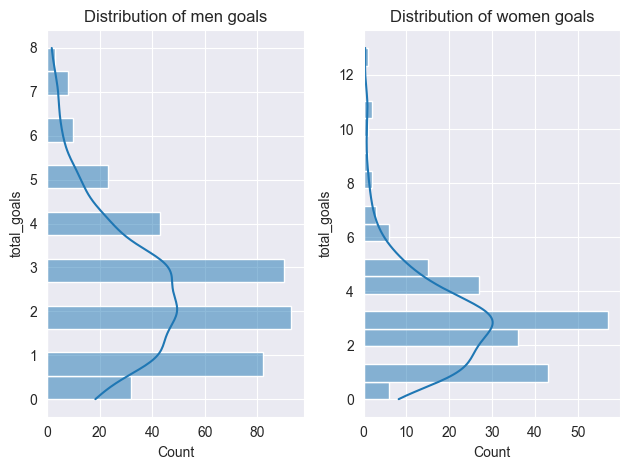

In [26]:
#distribution of men and female goals
fig, axs = plt.subplots(ncols=2)

sns.histplot(y=men_cup['total_goals'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of men goals')

sns.histplot(y=women_cup['total_goals'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of women goals')

plt.tight_layout()
plt.show()


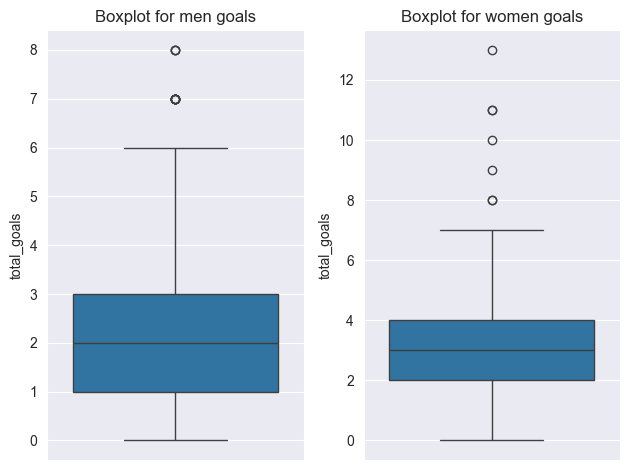

In [27]:
#box plot of the goals colunm
fig, axs = plt.subplots(ncols=2)

sns.boxplot(y=men_cup['total_goals'], ax=axs[0]).set_title('Boxplot for men goals')
sns.boxplot(y=women_cup['total_goals'], ax=axs[1]).set_title('Boxplot for women goals')

plt.tight_layout()
plt.show()

The distribution and boxplot indicate that women’s soccer matches tend to have more goals scored than men’s matches, with more extreme score lines observed in the women’s sport. In men’s matches, 75% of the goals fall below 3, while in women’s matches, 75% of the goals fall below 4. To confirm or refute our hypothesis, we’ll need to conduct a statistical test.

* Running a Mannwhitneyu Statisit test to Obtain the P_value

The Mann-Whitney U test, a nonparametric test, was chosen due to the following considerations:

- The data does not follow a uniform distribution
- The variables under study are independent

In [28]:
#checking the p-value
t_statistic, p_val = stats.mannwhitneyu(women_cup["total_goals"], men_cup["total_goals"],alternative="greater")
print(round(p_val,4))

0.0051


In [29]:
printmd(f"The p_val of {round(p_val,4)} is less than our significant value of\
         0.1, therfore we reject the Null hypothesis and conlude that\
             the average goals scored in the Womens sport is greater\
         than the Mens sport ")

The p_val of 0.0051 is less than our significant value of         0.1, therfore we reject the Null hypothesis and conlude that             the average goals scored in the Womens sport is greater         than the Mens sport 

* Conclusion

In this notebook, we delved into an intriguing question: Are more goals scored in women’s international soccer matches than men’s? Our exploration began with a comprehensive data analysis of official FIFA World Cup matches since 2002. The data revealed that women’s matches tend to have more goals scored and more extreme score lines.

However, to substantiate these observations, we conducted a rigorous statistical hypothesis test - the Mann-Whitney U test. Our null hypothesis stated that the average number of goals scored in women’s matches is the same as men’s, while the alternative hypothesis proposed that the average number of goals scored in women’s matches is greater than men’s.

The results were compelling. With a p-value of 0.0051, significantly less than our significance level of 0.1, we rejected the null hypothesis. This led us to the conclusion that the average number of goals scored in women’s international soccer matches is indeed greater than in men’s matches.

This finding not only sheds light on the dynamics of the beautiful game but also underscores the rising prominence and competitiveness of women’s soccer on the global stage. As the sport continues to evolve, it will be fascinating to see how these trends develop in the future.